# Steepest Descent

In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

Here's a function. It's an oblong bowl made of two quadratic functions.

This is pretty much the easiest 2D optimization job out there.

In [75]:
def f(x):
    return 1.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

Let's take a look at the function. First in 3D:

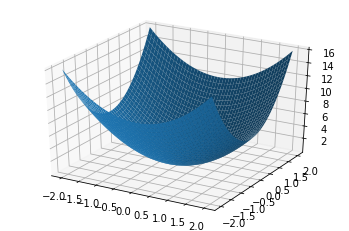

In [76]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

And then as a "contour plot":

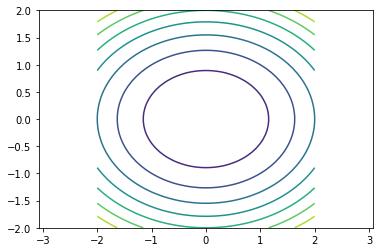

In [77]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)

Next, initialize steepest descent with a starting guess:

In [78]:
guesses = [np.array([2, 2./5])]

Next, run Steepest Descent:

In [118]:
x = guesses[-1]
s = -df(x)

def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s
guesses.append(next_guess)

print(next_guess)

[6.04860656e-09 1.20972136e-09]


Here's some plotting code to illustrate what just happened:

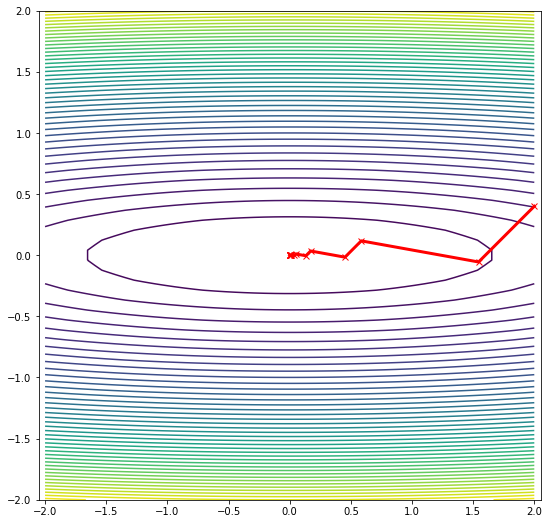

In [67]:
pt.figure(figsize=(9, 9))
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "rx-", lw=3)

In [68]:
for i, guess in enumerate(guesses):
    print(i, la.norm(guess, 2))

0 2.039607805437114
1 1.5454019892712514
2 0.5968371085234612
3 0.4522208888897409
4 0.17464854733563517
5 0.13233044707755506
6 0.05110626265644933
7 0.0387229936486977
8 0.014954891374893125
9 0.011331256334892202
10 0.004376152294833587
11 0.0033157916093362527
12 0.0012805649400668643
13 0.000970278502558215
14 0.0003747233493538883
15 0.00028392625725159426


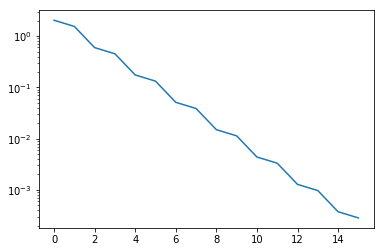

In [74]:
pt.semilogy([np.linalg.norm(np.array(g)) for g in guesses])

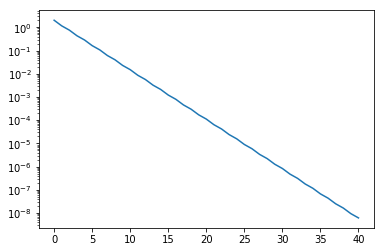

In [119]:
pt.semilogy([np.linalg.norm(np.array(g)) for g in guesses])

## Adding in "momentum" / the "heavy ball" method

Steepest descent with added "momentum" term:

$$x_{k+1} = x_k - \alpha \nabla f(x_k) \color{red}{+ \beta (x_{k}-x_{k-1})}$$

In [ ]:
guesses = [np.array([2, 2./5])]

# beta = 0.01
beta = 0.1
# beta = 0.5
# beta = 1

Explore different choices of the "momentum parameter" $\beta$ above.

In [ ]:
x = guesses[-1]
s = -df(x)

def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s

if len(guesses) >= 2:
    next_guess = next_guess + beta * (guesses[-1] - guesses[-2])

guesses.append(next_guess)

print(next_guess)

In [ ]:
pt.figure(figsize=(9, 9))
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")

In [ ]:
for i, guess in enumerate(guesses):
    print(i, la.norm(guess, 2))